# **01: PyTorch WorkFlow**


In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim


## **1: Data Preparation**

Data can be almost anything in ML.

ML is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in those numerical representation

Let's build some *known* datas for Linear Regression

In [3]:
## Video 1

weight = 0.7
bias = 0.3

# Create some data
start=0
end=1
step=0.02
X=torch.arange(start=start,end=end,step=step).unsqueeze(dim=1) # unsqueeze to make it a column vector basically adding a dimension to the tensor
y=weight*X+bias
X[0:10],y[0:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
## Video 2

### Split the data into training and testing, one of the most important concepts in ML
### We want to train the model on the training data and test it on the testing data
### This is to avoid overfitting

n_samples=X.shape[0]
n_train=int(0.8*n_samples)
n_test=n_samples-n_train
X_train=X[0:n_train]
y_train=y[0:n_train]
X_test=X[n_train:]
y_test=y[n_train:]



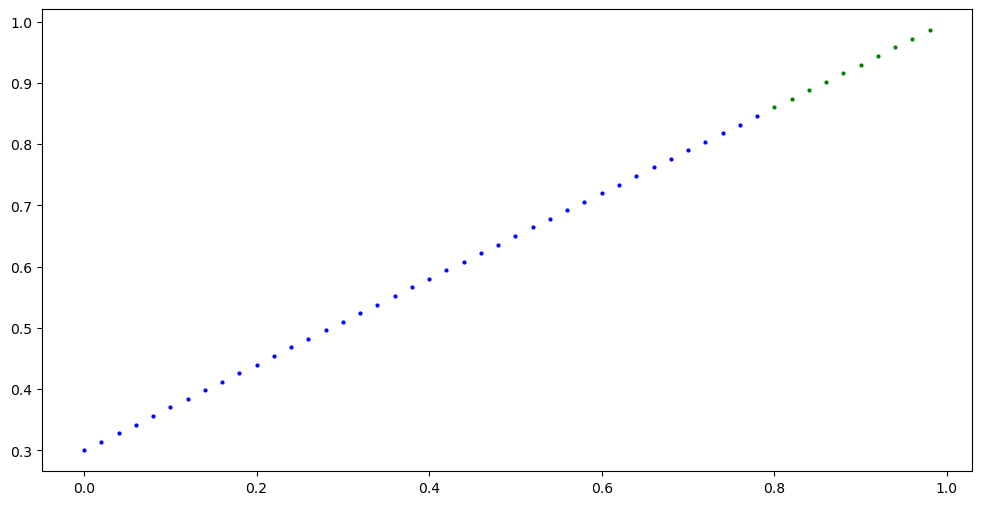

In [5]:
## Video 3

### Visualize the data

def plot_predictions(train_data=X_train, train_labels=y_train, test_datas=X_test, test_labels=y_test, prediction=None):
    """
    Plots the training data, testing data and the prediction of the model
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(train_data, train_labels, c="b", label="Training data",s=4)
    plt.scatter(test_datas, test_labels, c="g", label="Testing data",s=4)
    if prediction is not None:
        plt.plot(test_datas, prediction, c="r", label="Prediction")
    
    plt.show()
    
plot_predictions()

In [16]:
## Video 4

### Build the model

### Create a linear regression model class

class LinearRegressionModel(nn.Module): # <- Almost all PyTorch models are subclasses of nn.Module
    def __init__(self):
        super(LinearRegressionModel,self).__init__()
        self.weight=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
        self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
    
    
    def forward(self,X:torch.Tensor)->torch.Tensor: # <- This is the forward pass of the model
        return self.weight*X+self.bias
    

### Pytorch model building essentials

* torch.nn - contains all of the building blocks for computational graphs (a NN can be considered a computational graph)

* torch.nn.Parameters - what parameters should our model try and learn, often a PyTorch  layer from torch.nn will set those for us

* torch.nn.Module - the base class for all NN modules, if you subclass it you should overwrite forward()

* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent

* def forward() - this method defines what happens when you use the model on an input

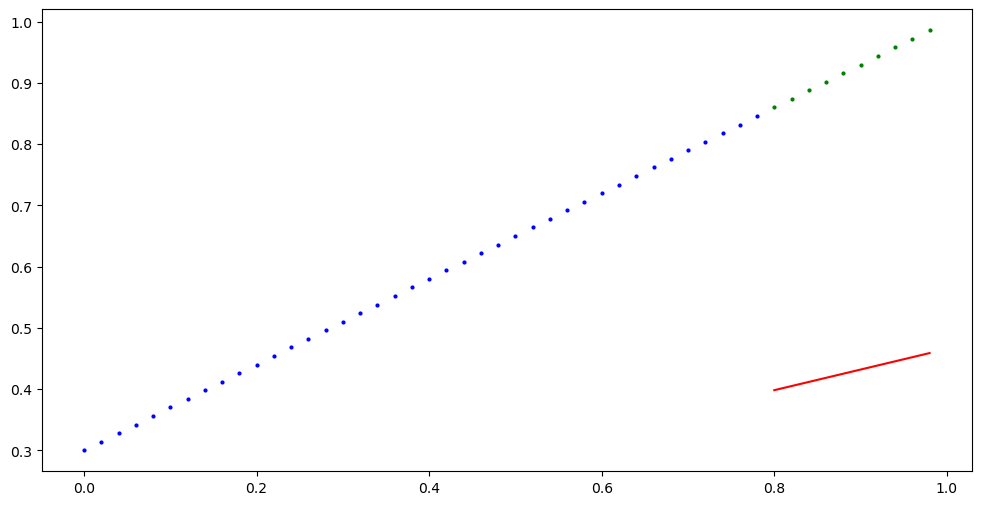

In [27]:
## Video 5

### Check out the model

torch.manual_seed(42)

### Create the model

model_0=LinearRegressionModel()


### Let's check how weel our model is doing on the test data
with torch.inference_mode():
    y_pred=model_0(X_test)

plot_predictions(train_data=X_train, train_labels=y_train, test_datas=X_test, test_labels=y_test, prediction=y_pred.detach().numpy())

### Not good at all, we need to train the model


In [28]:
## Video 6

### Train the model

### Define the loss function
loss_fn=nn.L1Loss() # <- Mean Absolute Error Loss

### Define the optimizer
optimizer=optim.SGD(model_0.parameters(),lr=0.01) # <- Stochastic Gradient Descent optimizer


### minuto 5:59:32

## **2: Build The Model**

## **3: Training**

## **4: Making Predictions**

## **5: Saving And Loading The Model**

## **6: Putting it all together**